### Linear Regression with PyTorch
#### Simple Linear Regression Basics
Nos permite entender la relacion entre dos variables continuas, donde una es una variable dependiente (y) y otra es independiente (x)
###### Objetivo prinicipal
Minimizar las distancias de los puntos respecto a la recta. Ajustando el coeficiente y el bias.

#### Construir un Model de Regresion Lineal con PyTorch
Coeficiente alfa = 2
Coeficiente beta = 1
Ecuacion = y = 2x+1


In [1]:
import numpy as np

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
#lo pasamos a numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [4]:
#lo convertimos en 2D
x_train = x_train.reshape(-1,1)
x_train.shape


(11, 1)

<b>y = 2x + 1</b>

In [9]:
y_values = [2*i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [11]:
#la manera larga:
y_values = []
for i in x_values:
    result = 2*i + 1
    y_values.append(result)

y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [12]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [13]:
#Importante: convertir a 2D
y_train = y_train.reshape(-1,1)
y_train.shape

(11, 1)

### Creando el Modelo 
<ul>
<li><b>Linear Model</b></li>    
    <li>True Equation: y = 2x+1</li>    
<li><b>Forward</b></li>    
    <li>Ejemplo:</li>    
        <li>Input x = 1</li>    
        <li>Output y = ?</li>    
</ul>

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [21]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
        out = self.linear(x)
        return out
    

##### Instanciar el Model Class

input: [0,1,2,3,4,5,6,7,8,9,10]

ouput deseado = [1,3,5,7,9,11,13,15,17,19,21]

In [35]:
#definimos las dimensiones 
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

##### Instanciaos el Loss Class
MSE Loss: Mean Squared Error

MSE = 1/n*(sumatoria(y feik - y real))


In [36]:
criterion = nn.MSELoss()

##### Instanciamos Optimizer Class
Ecuacion simplificada = teta = teta - n*Triangulo

Donde:

teta:parametros (nuestras variables(alfa y beta))

n = learning rate (que tan rapido va a aprender)

triangulo = gradientes de los parametros(?)

Ecuacion mas simple aun = parametros = parametros - learning_rate * parameters_gradients

parametros: alfa y beta en y = alfa(x) + beta // vamos a estar modificando alfa y beta lo mas optimo posibles

parametros deseados: alfa = 2 y beta = 1 en y= 2x +1

In [37]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

##### ENTRENAR MODELO
<ul>
    <li><b>1 epoch sondea todo el x_train una vez</b></li>
    <li>   100 epochs sondea todo el x_train 100 veces</li>
</ul>


In [38]:
epochs = 100

In [43]:
for epoch in range(epochs):
    epoch +=1
    # Convertir el array numpy a una variable Torch 
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #limpiar las gradientes relacionadas a los parametros para que no se acumule
    optimizer.zero_grad()
    
    #Forward para obtener el output
    outputs = model(inputs)
    
    #calcular el loss
    loss = criterion(outputs, labels)
    
    #Obtener las gradientes con respecto a los parametros
    loss.backward()
    
    #Actualizar los parametros
    optimizer.step()
    
    print("epoch {}, loss {} ".format(epoch, loss.data)) #en pytorch arriba de 0.5 se pone directo loss.data sin el "[0]": https://github.com/NVIDIA/flownet2-pytorch/issues/113
    

epoch 1, loss 0.546671986579895 
epoch 2, loss 0.5382681488990784 
epoch 3, loss 0.532069742679596 
epoch 4, loss 0.5261132717132568 
epoch 5, loss 0.5202367901802063 
epoch 6, loss 0.514427125453949 
epoch 7, loss 0.508682906627655 
epoch 8, loss 0.5030019879341125 
epoch 9, loss 0.497385174036026 
epoch 10, loss 0.49183112382888794 
epoch 11, loss 0.48633864521980286 
epoch 12, loss 0.48090794682502747 
epoch 13, loss 0.4755377471446991 
epoch 14, loss 0.47022759914398193 
epoch 15, loss 0.4649767279624939 
epoch 16, loss 0.4597840905189514 
epoch 17, loss 0.4546498656272888 
epoch 18, loss 0.44957324862480164 
epoch 19, loss 0.44455280900001526 
epoch 20, loss 0.4395882487297058 
epoch 21, loss 0.43467947840690613 
epoch 22, loss 0.4298252761363983 
epoch 23, loss 0.4250257909297943 
epoch 24, loss 0.42027971148490906 
epoch 25, loss 0.4155865013599396 
epoch 26, loss 0.4109455347061157 
epoch 27, loss 0.40635648369789124 
epoch 28, loss 0.4018189013004303 
epoch 29, loss 0.39733195

In [46]:
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[ 0.2129467],
       [ 2.3262894],
       [ 4.4396324],
       [ 6.552975 ],
       [ 8.666318 ],
       [10.77966  ],
       [12.893003 ],
       [15.006347 ],
       [17.119688 ],
       [19.23303  ],
       [21.346373 ]], dtype=float32)

In [47]:
y_train


array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### PLOT GRAPH 


In [49]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

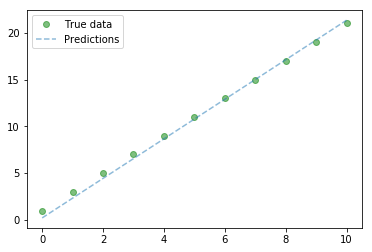

In [51]:
#limpiar la figura(?)
plt.clf()

#Get predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

#Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

#Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha =0.5)

#Legend and plot
plt.legend(loc='best')
plt.show()

#### Save model

In [53]:
save_model = False
if save_model is True:
    #save only parameters
    torch.save(model.state_dict(), 'awesome_model.pkl')

#### Load model

In [54]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))